In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from time import time
from datetime import datetime
import sqlite3
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect , desc, distinct, func

In [2]:
engine = create_engine('sqlite:///hawaii_sqlite.sqlite')

In [3]:
inspector = inspect(engine)

In [4]:
inspector.get_table_names()

['measurement_data', 'station_data']

In [5]:
measurement_columns = inspector.get_columns('measurement_data')
for column in measurement_columns:
    print(column['name'], column['type'])

id INTEGER
station VARCHAR(255)
date DATETIME
precipitation FLOAT
temperature INTEGER


In [6]:
station_columns = inspector.get_columns('station_data')
for column in station_columns:
    print(column['name'], column['type'])

id INTEGER
station VARCHAR(255)
name VARCHAR(255)
latitude FLOAT
longitude FLOAT
elevation FLOAT
location VARCHAR(255)


In [7]:
Base = automap_base()
Base.prepare(engine,reflect = True)
Measurement = Base.classes.measurement_data
Station = Base.classes.station_data
session = Session(engine)


In [8]:
latest_date = session.query(Measurement).order_by(desc(Measurement.date)).first()
latest_date.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x283bafe1240>,
 'date': datetime.datetime(2017, 8, 23, 0, 0),
 'id': 2685,
 'precipitation': 0.0,
 'station': 'USC00519397',
 'temperature': 81}

In [9]:
for row in session.query(Measurement.precipitation, Measurement.date).filter(Measurement.date.between('2016-08-24', '2017-08-23')).all():
    print (row)

(0.08, datetime.datetime(2016, 8, 24, 0, 0))
(0.08, datetime.datetime(2016, 8, 25, 0, 0))
(0.0, datetime.datetime(2016, 8, 26, 0, 0))
(0.0, datetime.datetime(2016, 8, 27, 0, 0))
(0.01, datetime.datetime(2016, 8, 28, 0, 0))
(0.0, datetime.datetime(2016, 8, 29, 0, 0))
(0.0, datetime.datetime(2016, 8, 30, 0, 0))
(0.13, datetime.datetime(2016, 8, 31, 0, 0))
(0.0, datetime.datetime(2016, 9, 1, 0, 0))
(0.0, datetime.datetime(2016, 9, 2, 0, 0))
(0.0, datetime.datetime(2016, 9, 3, 0, 0))
(0.03, datetime.datetime(2016, 9, 4, 0, 0))
(0.05, datetime.datetime(2016, 9, 7, 0, 0))
(0.0, datetime.datetime(2016, 9, 8, 0, 0))
(0.03, datetime.datetime(2016, 9, 9, 0, 0))
(0.0, datetime.datetime(2016, 9, 10, 0, 0))
(0.05, datetime.datetime(2016, 9, 11, 0, 0))
(0.0, datetime.datetime(2016, 9, 12, 0, 0))
(0.02, datetime.datetime(2016, 9, 13, 0, 0))
(1.32, datetime.datetime(2016, 9, 14, 0, 0))
(0.42, datetime.datetime(2016, 9, 15, 0, 0))
(0.06, datetime.datetime(2016, 9, 16, 0, 0))
(0.05, datetime.datetime(20

(0.2, datetime.datetime(2016, 10, 27, 0, 0))
(0.07, datetime.datetime(2016, 10, 28, 0, 0))
(0.26, datetime.datetime(2016, 10, 29, 0, 0))
(0.14, datetime.datetime(2016, 10, 30, 0, 0))
(0.0, datetime.datetime(2016, 10, 31, 0, 0))
(0.0, datetime.datetime(2016, 11, 1, 0, 0))
(0.0, datetime.datetime(2016, 11, 2, 0, 0))
(0.0, datetime.datetime(2016, 11, 3, 0, 0))
(0.0, datetime.datetime(2016, 11, 4, 0, 0))
(0.0, datetime.datetime(2016, 11, 5, 0, 0))
(0.0, datetime.datetime(2016, 11, 6, 0, 0))
(0.13, datetime.datetime(2016, 11, 7, 0, 0))
(0.02, datetime.datetime(2016, 11, 8, 0, 0))
(0.17, datetime.datetime(2016, 11, 9, 0, 0))
(0.0, datetime.datetime(2016, 11, 10, 0, 0))
(0.0, datetime.datetime(2016, 11, 11, 0, 0))
(0.0, datetime.datetime(2016, 11, 12, 0, 0))
(0.0, datetime.datetime(2016, 11, 13, 0, 0))
(0.05, datetime.datetime(2016, 11, 14, 0, 0))
(0.0, datetime.datetime(2016, 11, 15, 0, 0))
(0.18, datetime.datetime(2016, 11, 16, 0, 0))
(0.0, datetime.datetime(2016, 11, 17, 0, 0))
(0.02, date

(3.46, datetime.datetime(2016, 10, 4, 0, 0))
(0.81, datetime.datetime(2016, 10, 5, 0, 0))
(0.04, datetime.datetime(2016, 10, 6, 0, 0))
(0.01, datetime.datetime(2016, 10, 7, 0, 0))
(0.04, datetime.datetime(2016, 10, 8, 0, 0))
(0.0, datetime.datetime(2016, 10, 9, 0, 0))
(0.0, datetime.datetime(2016, 10, 10, 0, 0))
(0.35, datetime.datetime(2016, 10, 11, 0, 0))
(0.02, datetime.datetime(2016, 10, 12, 0, 0))
(0.06, datetime.datetime(2016, 10, 13, 0, 0))
(0.0, datetime.datetime(2016, 10, 14, 0, 0))
(0.33, datetime.datetime(2016, 10, 15, 0, 0))
(0.0, datetime.datetime(2016, 10, 16, 0, 0))
(0.38, datetime.datetime(2016, 10, 17, 0, 0))
(0.48, datetime.datetime(2016, 10, 18, 0, 0))
(0.0, datetime.datetime(2016, 10, 19, 0, 0))
(1.0, datetime.datetime(2016, 10, 20, 0, 0))
(0.09, datetime.datetime(2016, 10, 21, 0, 0))
(1.37, datetime.datetime(2016, 10, 22, 0, 0))
(0.24, datetime.datetime(2016, 10, 23, 0, 0))
(0.7, datetime.datetime(2016, 10, 24, 0, 0))
(0.4, datetime.datetime(2016, 10, 25, 0, 0))
(0

(0.02, datetime.datetime(2017, 6, 5, 0, 0))
(0.0, datetime.datetime(2017, 6, 6, 0, 0))
(0.0, datetime.datetime(2017, 6, 7, 0, 0))
(0.01, datetime.datetime(2017, 6, 8, 0, 0))
(0.0, datetime.datetime(2017, 6, 9, 0, 0))
(0.53, datetime.datetime(2017, 6, 10, 0, 0))
(0.14, datetime.datetime(2017, 6, 11, 0, 0))
(0.35, datetime.datetime(2017, 6, 12, 0, 0))
(0.1, datetime.datetime(2017, 6, 13, 0, 0))
(0.21, datetime.datetime(2017, 6, 14, 0, 0))
(0.3, datetime.datetime(2017, 6, 15, 0, 0))
(0.02, datetime.datetime(2017, 6, 16, 0, 0))
(0.02, datetime.datetime(2017, 6, 17, 0, 0))
(0.18, datetime.datetime(2017, 6, 18, 0, 0))
(0.19, datetime.datetime(2017, 6, 19, 0, 0))
(0.17, datetime.datetime(2017, 6, 20, 0, 0))
(0.0, datetime.datetime(2017, 6, 30, 0, 0))
(0.06, datetime.datetime(2017, 7, 8, 0, 0))
(0.0, datetime.datetime(2017, 7, 9, 0, 0))
(0.0, datetime.datetime(2017, 7, 10, 0, 0))
(0.0, datetime.datetime(2017, 7, 11, 0, 0))
(0.02, datetime.datetime(2017, 7, 12, 0, 0))
(0.3, datetime.datetime(20

(0.3, datetime.datetime(2017, 7, 26, 0, 0))
(0.0, datetime.datetime(2017, 7, 27, 0, 0))
(0.4, datetime.datetime(2017, 7, 28, 0, 0))
(0.3, datetime.datetime(2017, 7, 29, 0, 0))
(0.3, datetime.datetime(2017, 7, 30, 0, 0))
(0.0, datetime.datetime(2017, 7, 31, 0, 0))
(0.25, datetime.datetime(2017, 8, 2, 0, 0))
(0.06, datetime.datetime(2017, 8, 3, 0, 0))
(0.05, datetime.datetime(2017, 8, 7, 0, 0))
(0.34, datetime.datetime(2017, 8, 8, 0, 0))
(0.15, datetime.datetime(2017, 8, 9, 0, 0))
(0.07, datetime.datetime(2017, 8, 10, 0, 0))
(0.14, datetime.datetime(2017, 8, 12, 0, 0))
(0.22, datetime.datetime(2017, 8, 14, 0, 0))
(0.42, datetime.datetime(2017, 8, 15, 0, 0))
(0.42, datetime.datetime(2017, 8, 16, 0, 0))
(0.13, datetime.datetime(2017, 8, 17, 0, 0))
(0.09, datetime.datetime(2017, 8, 19, 0, 0))
(0.56, datetime.datetime(2017, 8, 21, 0, 0))
(0.5, datetime.datetime(2017, 8, 22, 0, 0))


In [10]:
results = session.query(Measurement.precipitation, Measurement.date).filter(Measurement.date.between('2016-08-24', '2017-08-23')).all()

In [11]:
precip = [result[0] for result in results[0:]]
year = [result[1] for result in results[0:]]
annual_precip = pd.DataFrame({'Precipitation':precip , 'Date':year})

<IPython.core.display.Javascript object>


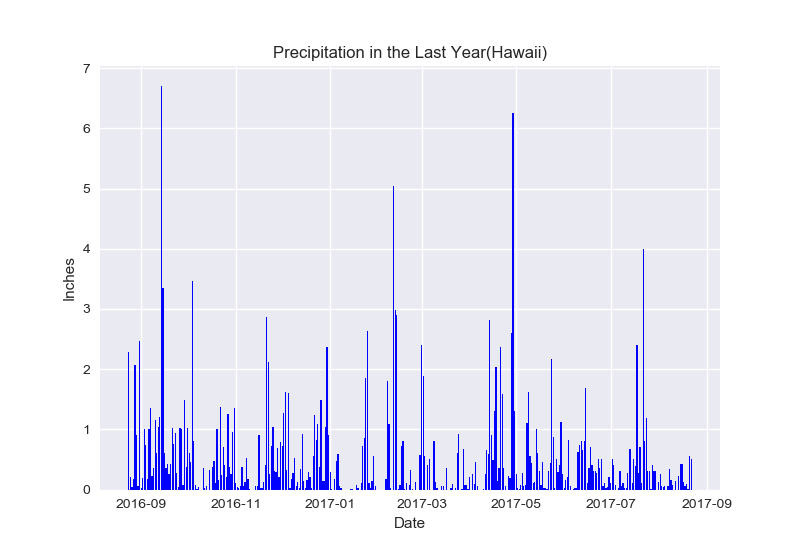

In [12]:
plt.bar(year, precip, color = 'b', )
plt.title('Precipitation in the Last Year(Hawaii)')
plt.xlabel('Date')
plt.ylabel("Inches")
plt.show()

In [13]:
annual_precip.describe()

,Precipitation
count,4022.000000
mean,0.176549
std,0.460610
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
number_of_stations = session.query(Measurement.station).distinct(Measurement.station).count()
print(number_of_stations)

9


In [15]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.temperature)).\
                                     group_by(Measurement.station).order_by(desc(func.count(Measurement.temperature)))
for station, count in most_active_stations:
    print (station, count)

USC00519281 5544
USC00513117 5392
USC00519397 5370
USC00519523 5144
USC00516128 4968
USC00514830 3874
USC00511918 3864
USC00517948 1366
USC00518838 684


In [16]:
results1 = session.query(Measurement.temperature).filter(Measurement.station =='USC00519281')
station_temp = [result[0] for result in results1[0:]]


<IPython.core.display.Javascript object>


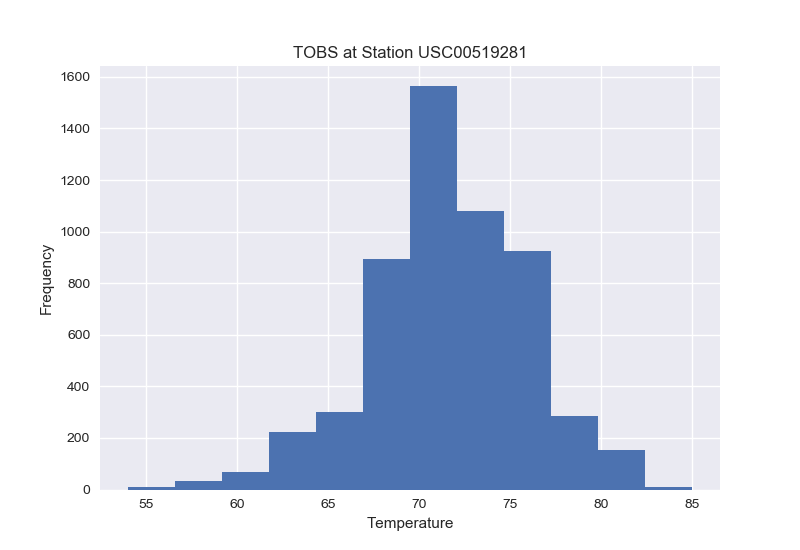

In [17]:
plt.hist(station_temp, bins = 12)
plt.title('TOBS at Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.show()

In [18]:
def calc_temps(start_date, end_date):
    trip_min = session.query(func.min(Measurement.temperature)).filter(Measurement.date.between(start_date , end_date))
    trip_max = session.query(func.max(Measurement.temperature)).filter(Measurement.date.between(start_date , end_date))
    trip_avg = session.query(func.avg(Measurement.temperature)).filter(Measurement.date.between(start_date , end_date))
    result_min =[result[0] for result in trip_min]
    result_max =[result[0] for result in trip_max]   
    result_avg =[result[0] for result in trip_avg]
    your_temps = [result_min, result_max, result_avg]
    return your_temps

In [19]:
min_temp = calc_temps('2017-01-01','2017-01-14')[0]
max_temp = calc_temps('2017-01-01','2017-01-14')[1]
avg_temp = calc_temps('2017-01-01','2017-01-14')[2]


<IPython.core.display.Javascript object>


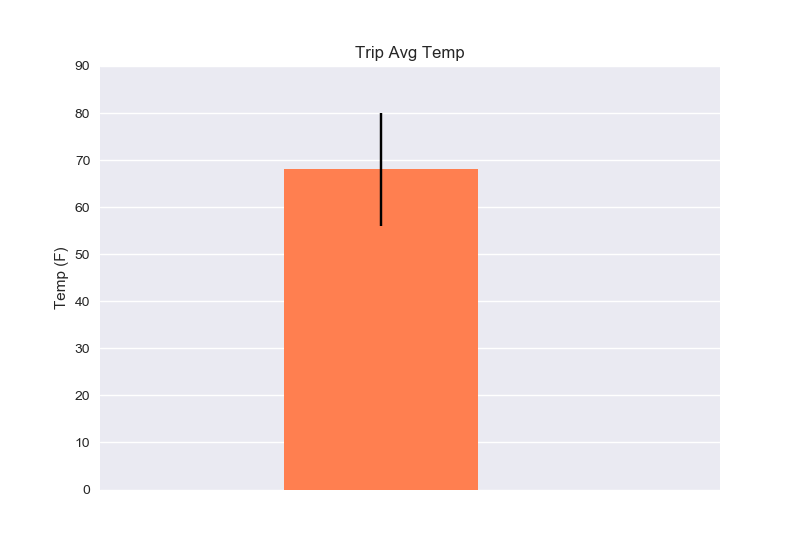

In [20]:

plt.bar(1, avg_temp, color = 'coral', yerr = 12)
plt.xlim(-.16, 2.4)
plt.ylim([0,90])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.show()